# Notebook for the compuation of the hash-based similarities

Containing methods and functionality for computing and measuring similarities from the hashes

In [1]:
from experiments.grid_resolution import plot_grid_res_layers
from experiments.disk_resolution import plot_disk_dia_layers
from experiments.disk_resolution import plot_disk_numbers


c:\Users\47412\MyStuff\ny\master\code\experiments\disk_resolution.py:176: SyntaxWarning: invalid escape sequence '\-'
  ax2.set_ylabel("Standard deviation \- Dashed lines", fontsize=18)


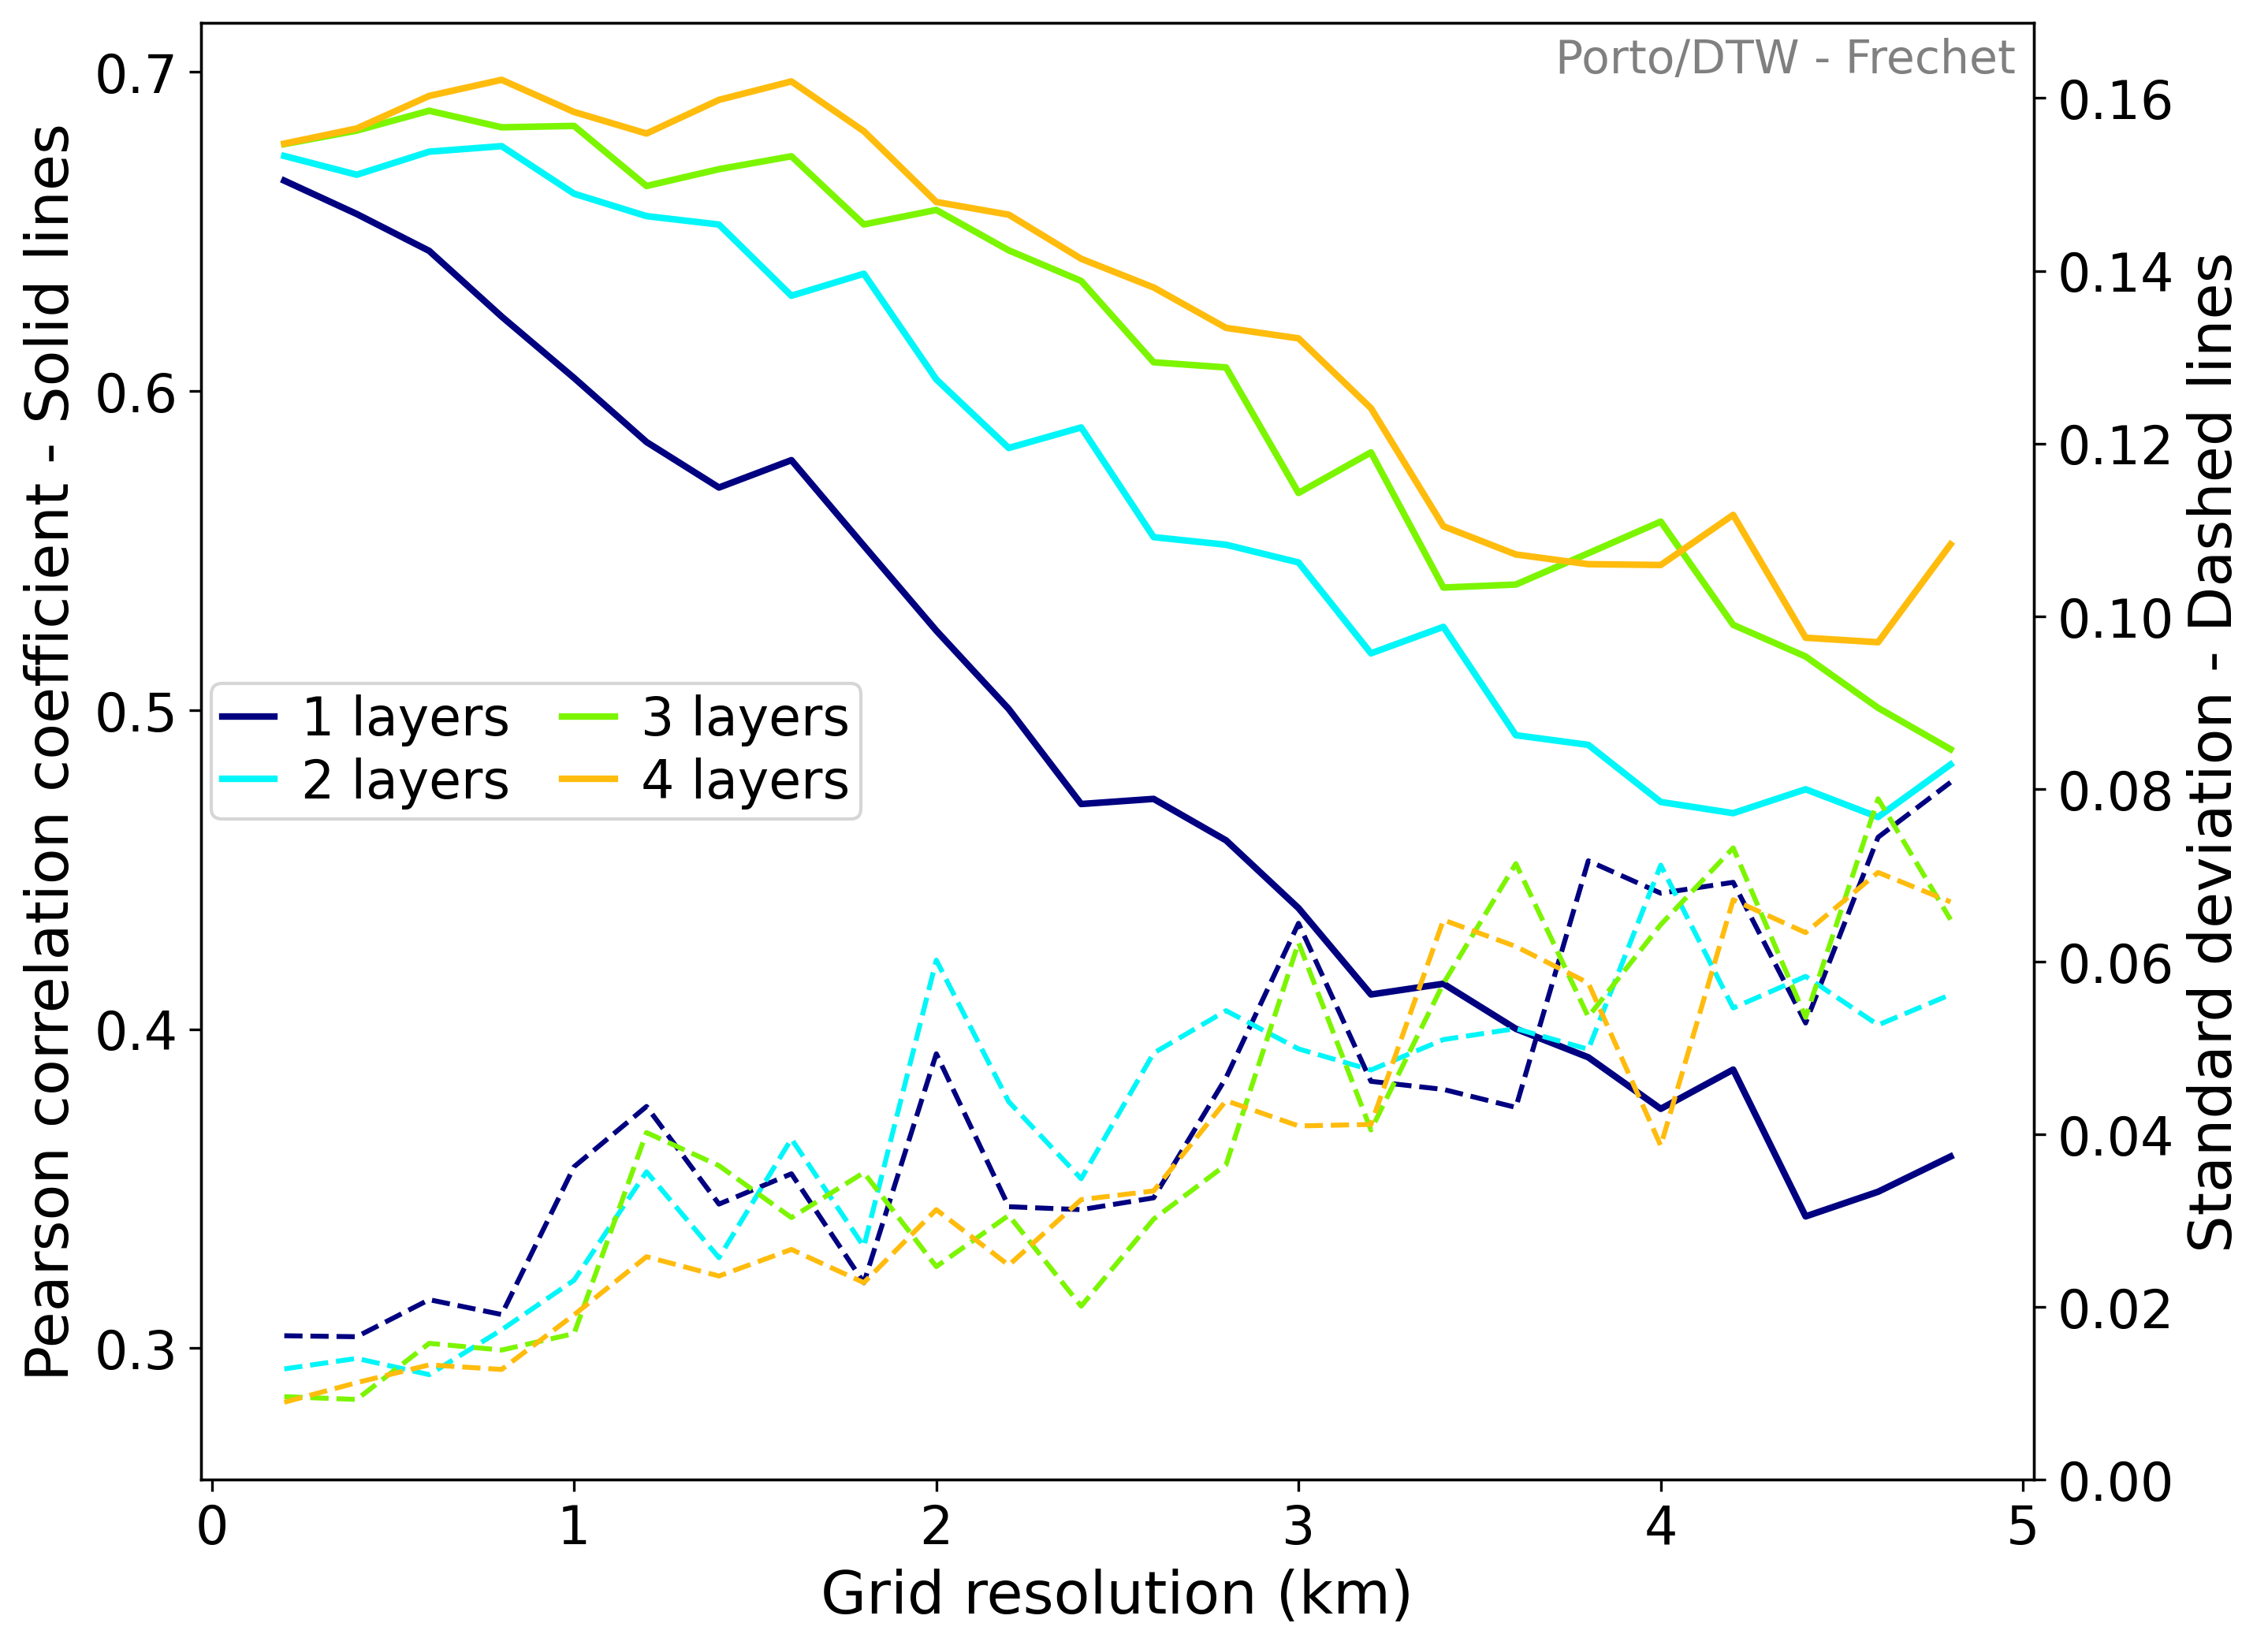

In [2]:
#Test-plot
plot_grid_res_layers("porto", [1,2,3,4], [0.2, 5, 0.2], parallell_jobs=20, reference="frechet")


## Grid Porto

In [2]:
# Porto/DTW - Frechet
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], parallell_jobs=20, reference="frechet")

In [3]:
# Porto/DTW - DTW
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], parallell_jobs=20, reference="dtw")

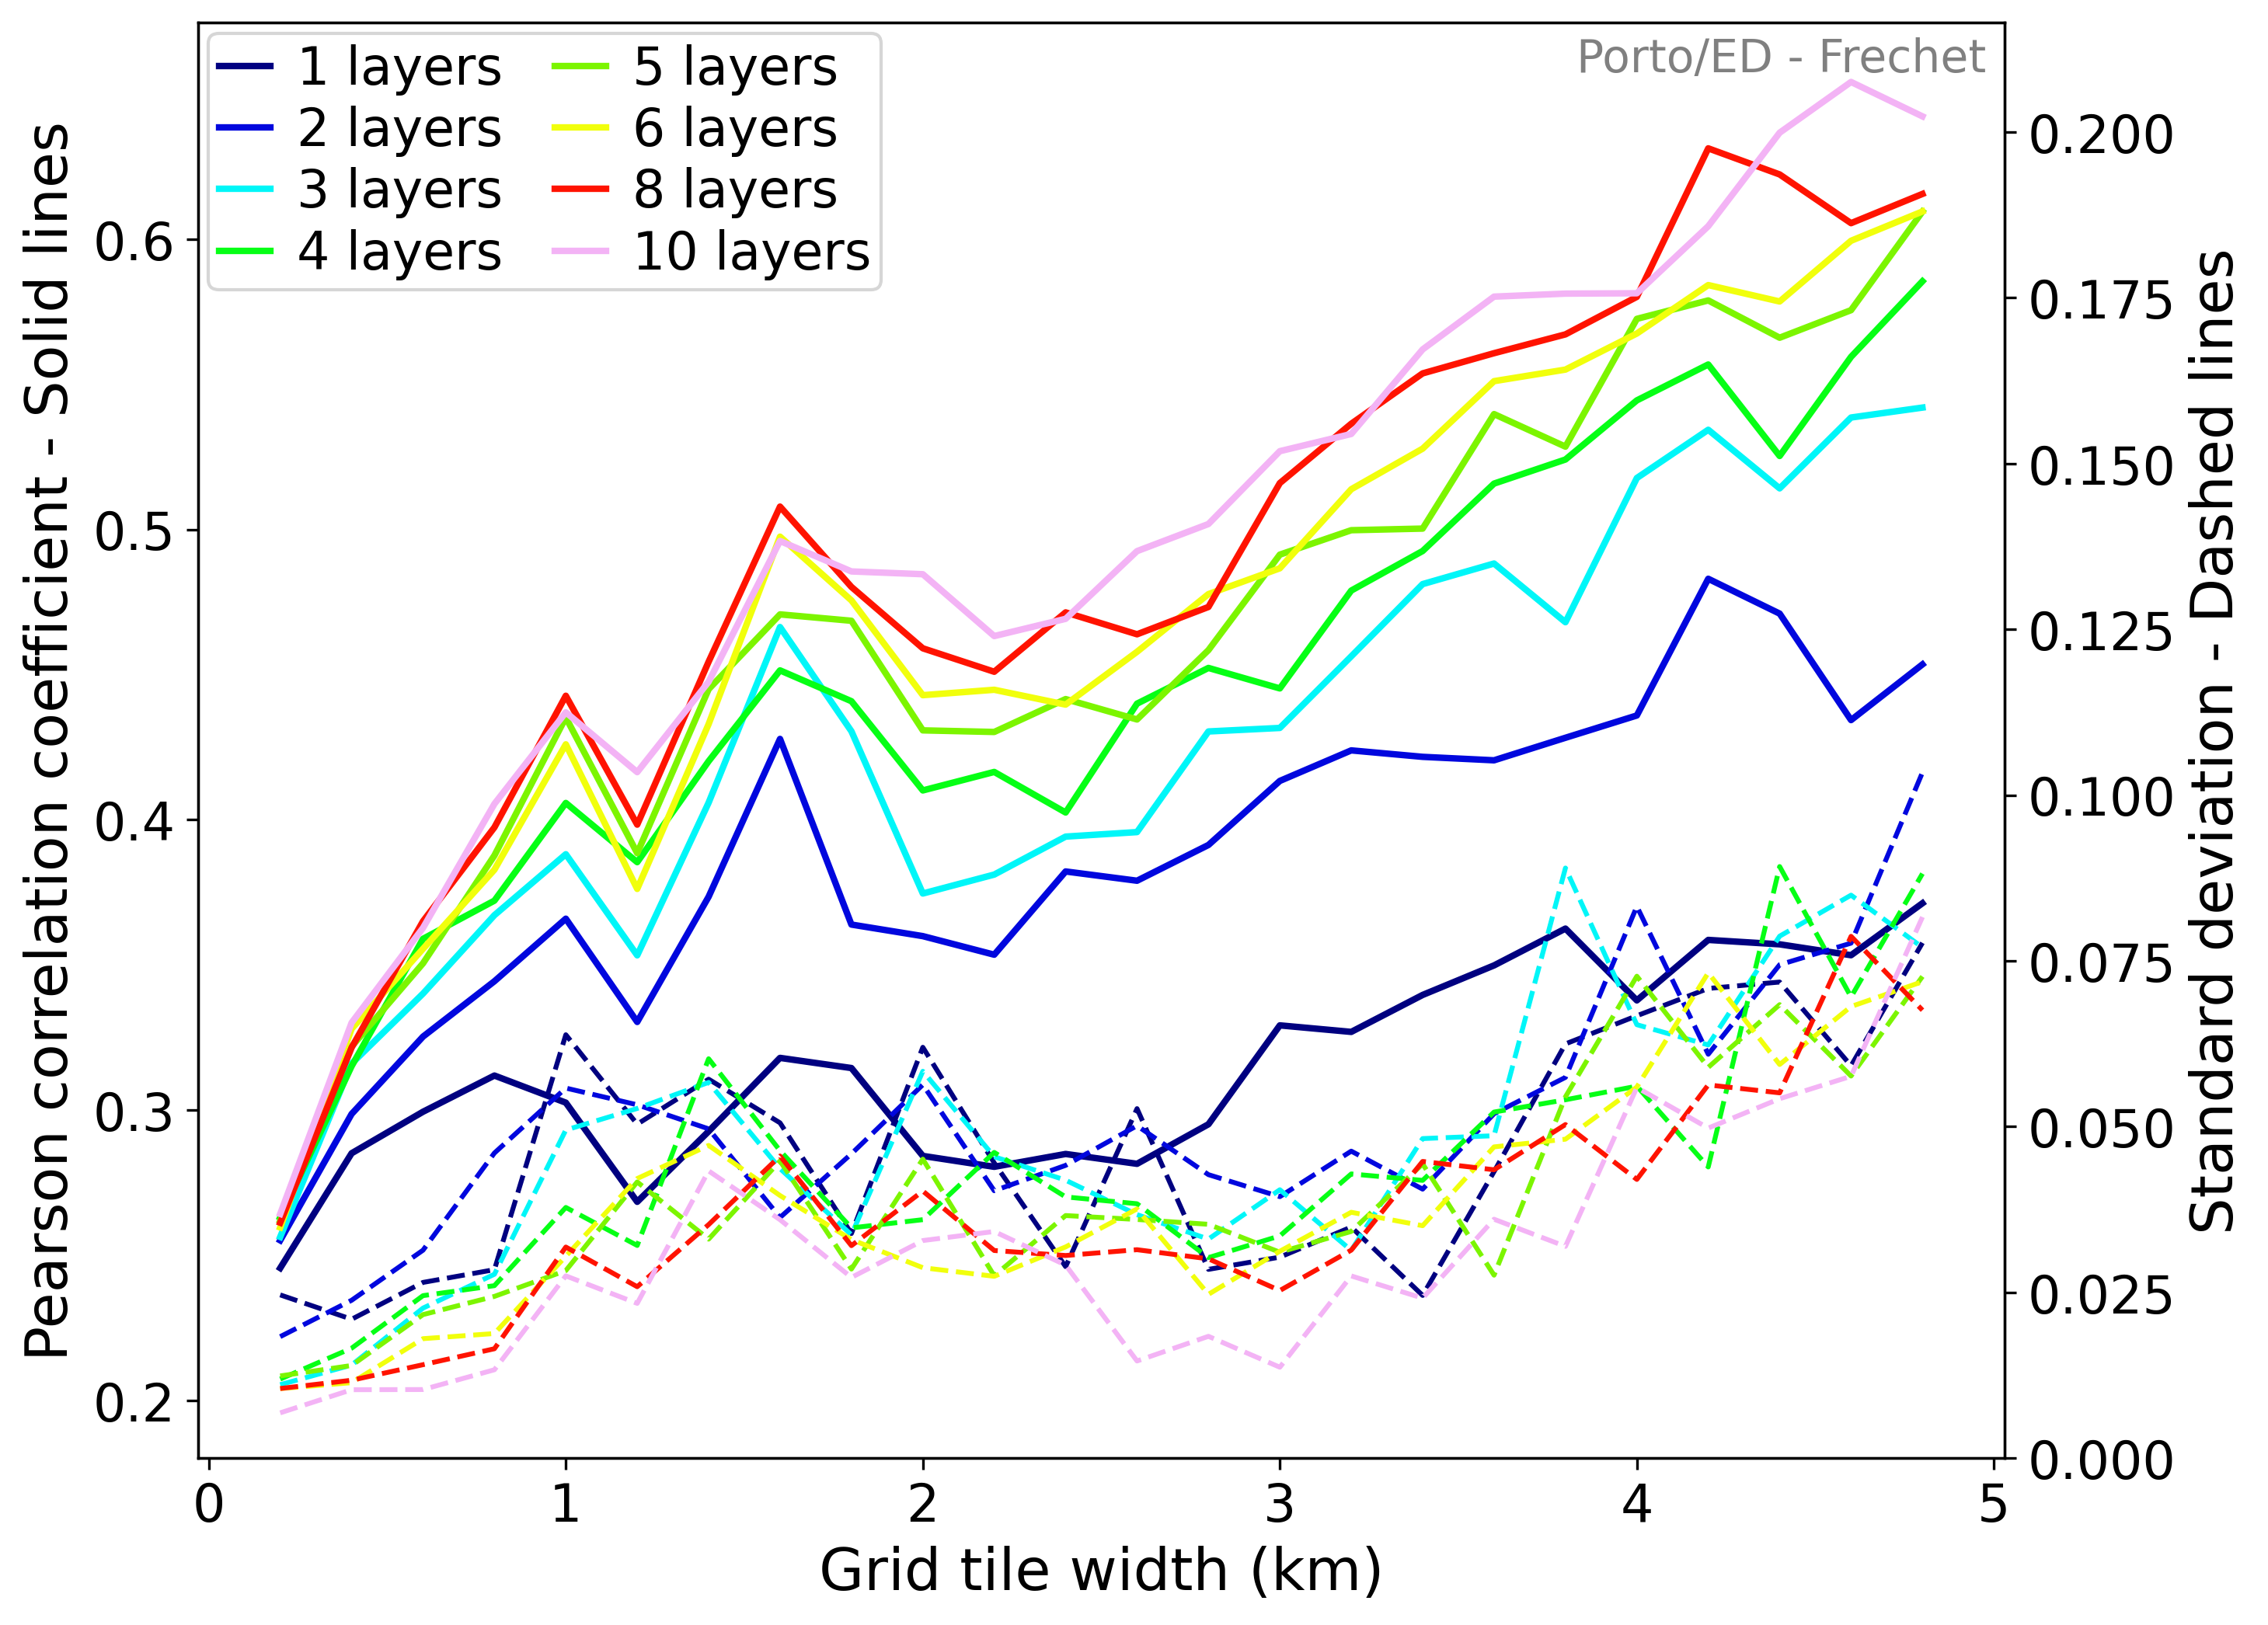

In [2]:
# Porto/ED - Frechet
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], measure="py_ed", parallell_jobs=20, reference="frechet")

In [3]:
# Porto/ED - DTW
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], measure="py_ed", parallell_jobs=20, reference="dtw")

# Disk Porto

In [2]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_dtw", reference="dtw", parallell_jobs=20 )

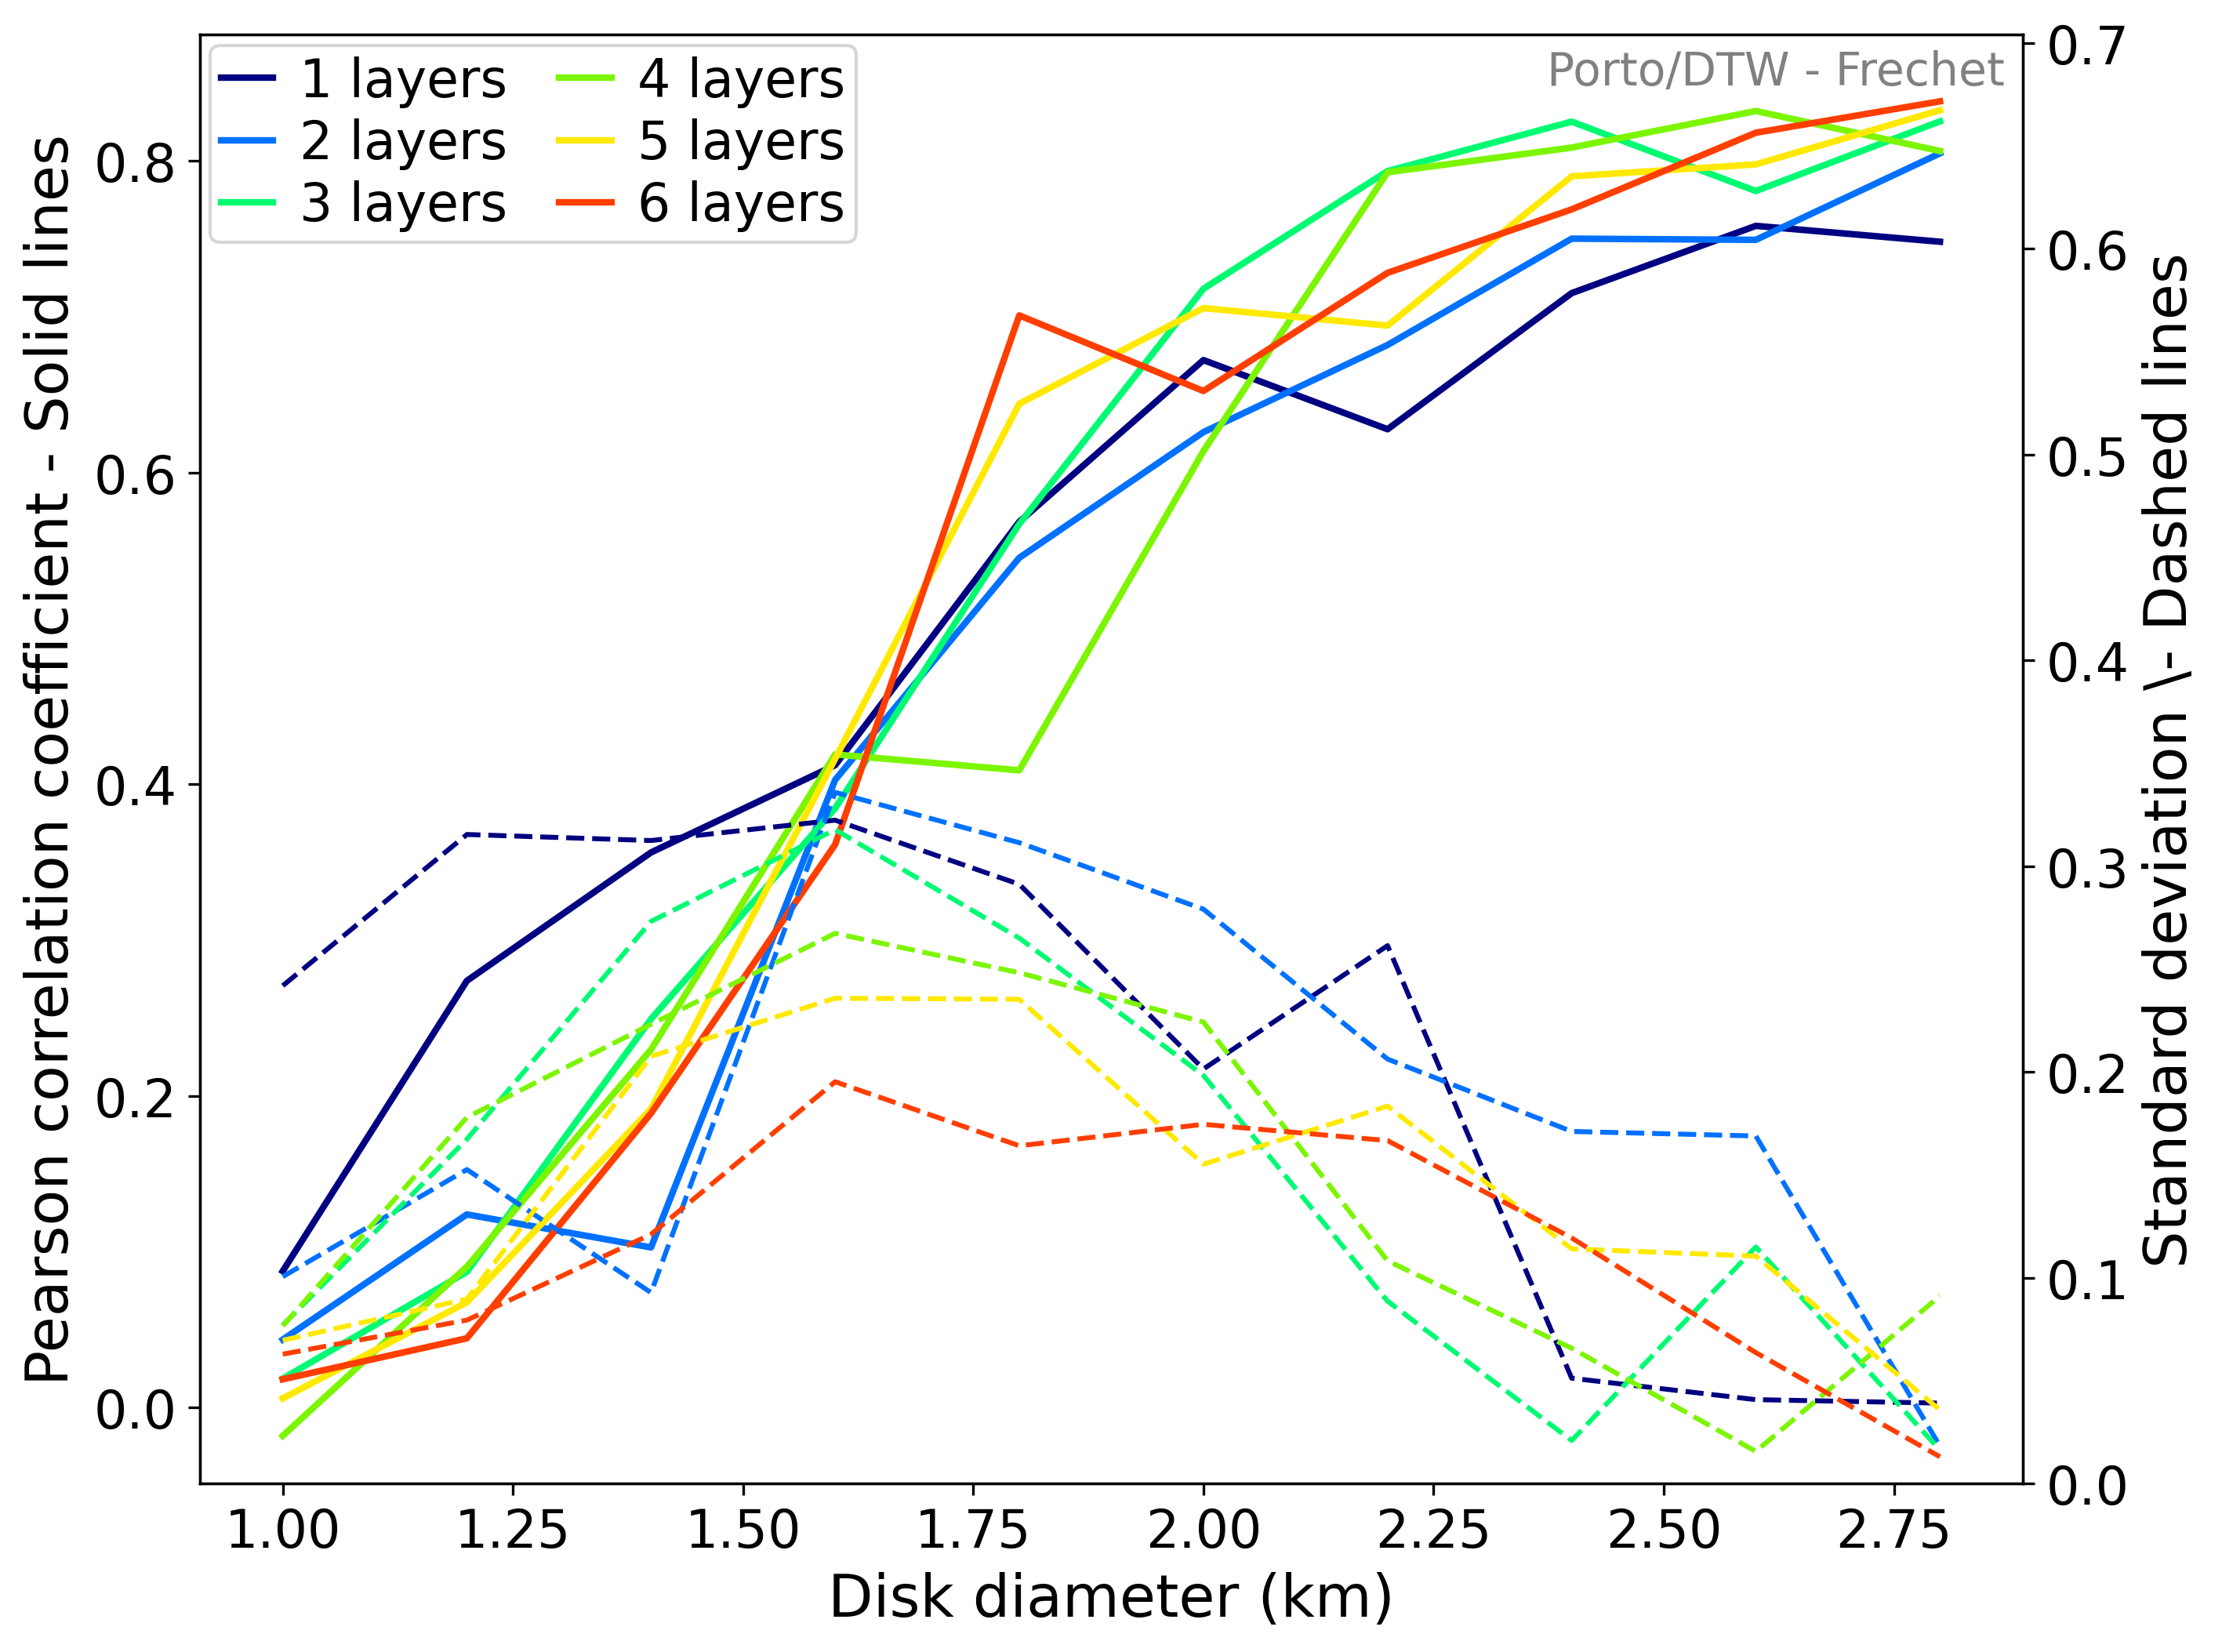

In [3]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_dtw", reference="frechet", parallell_jobs=20 )

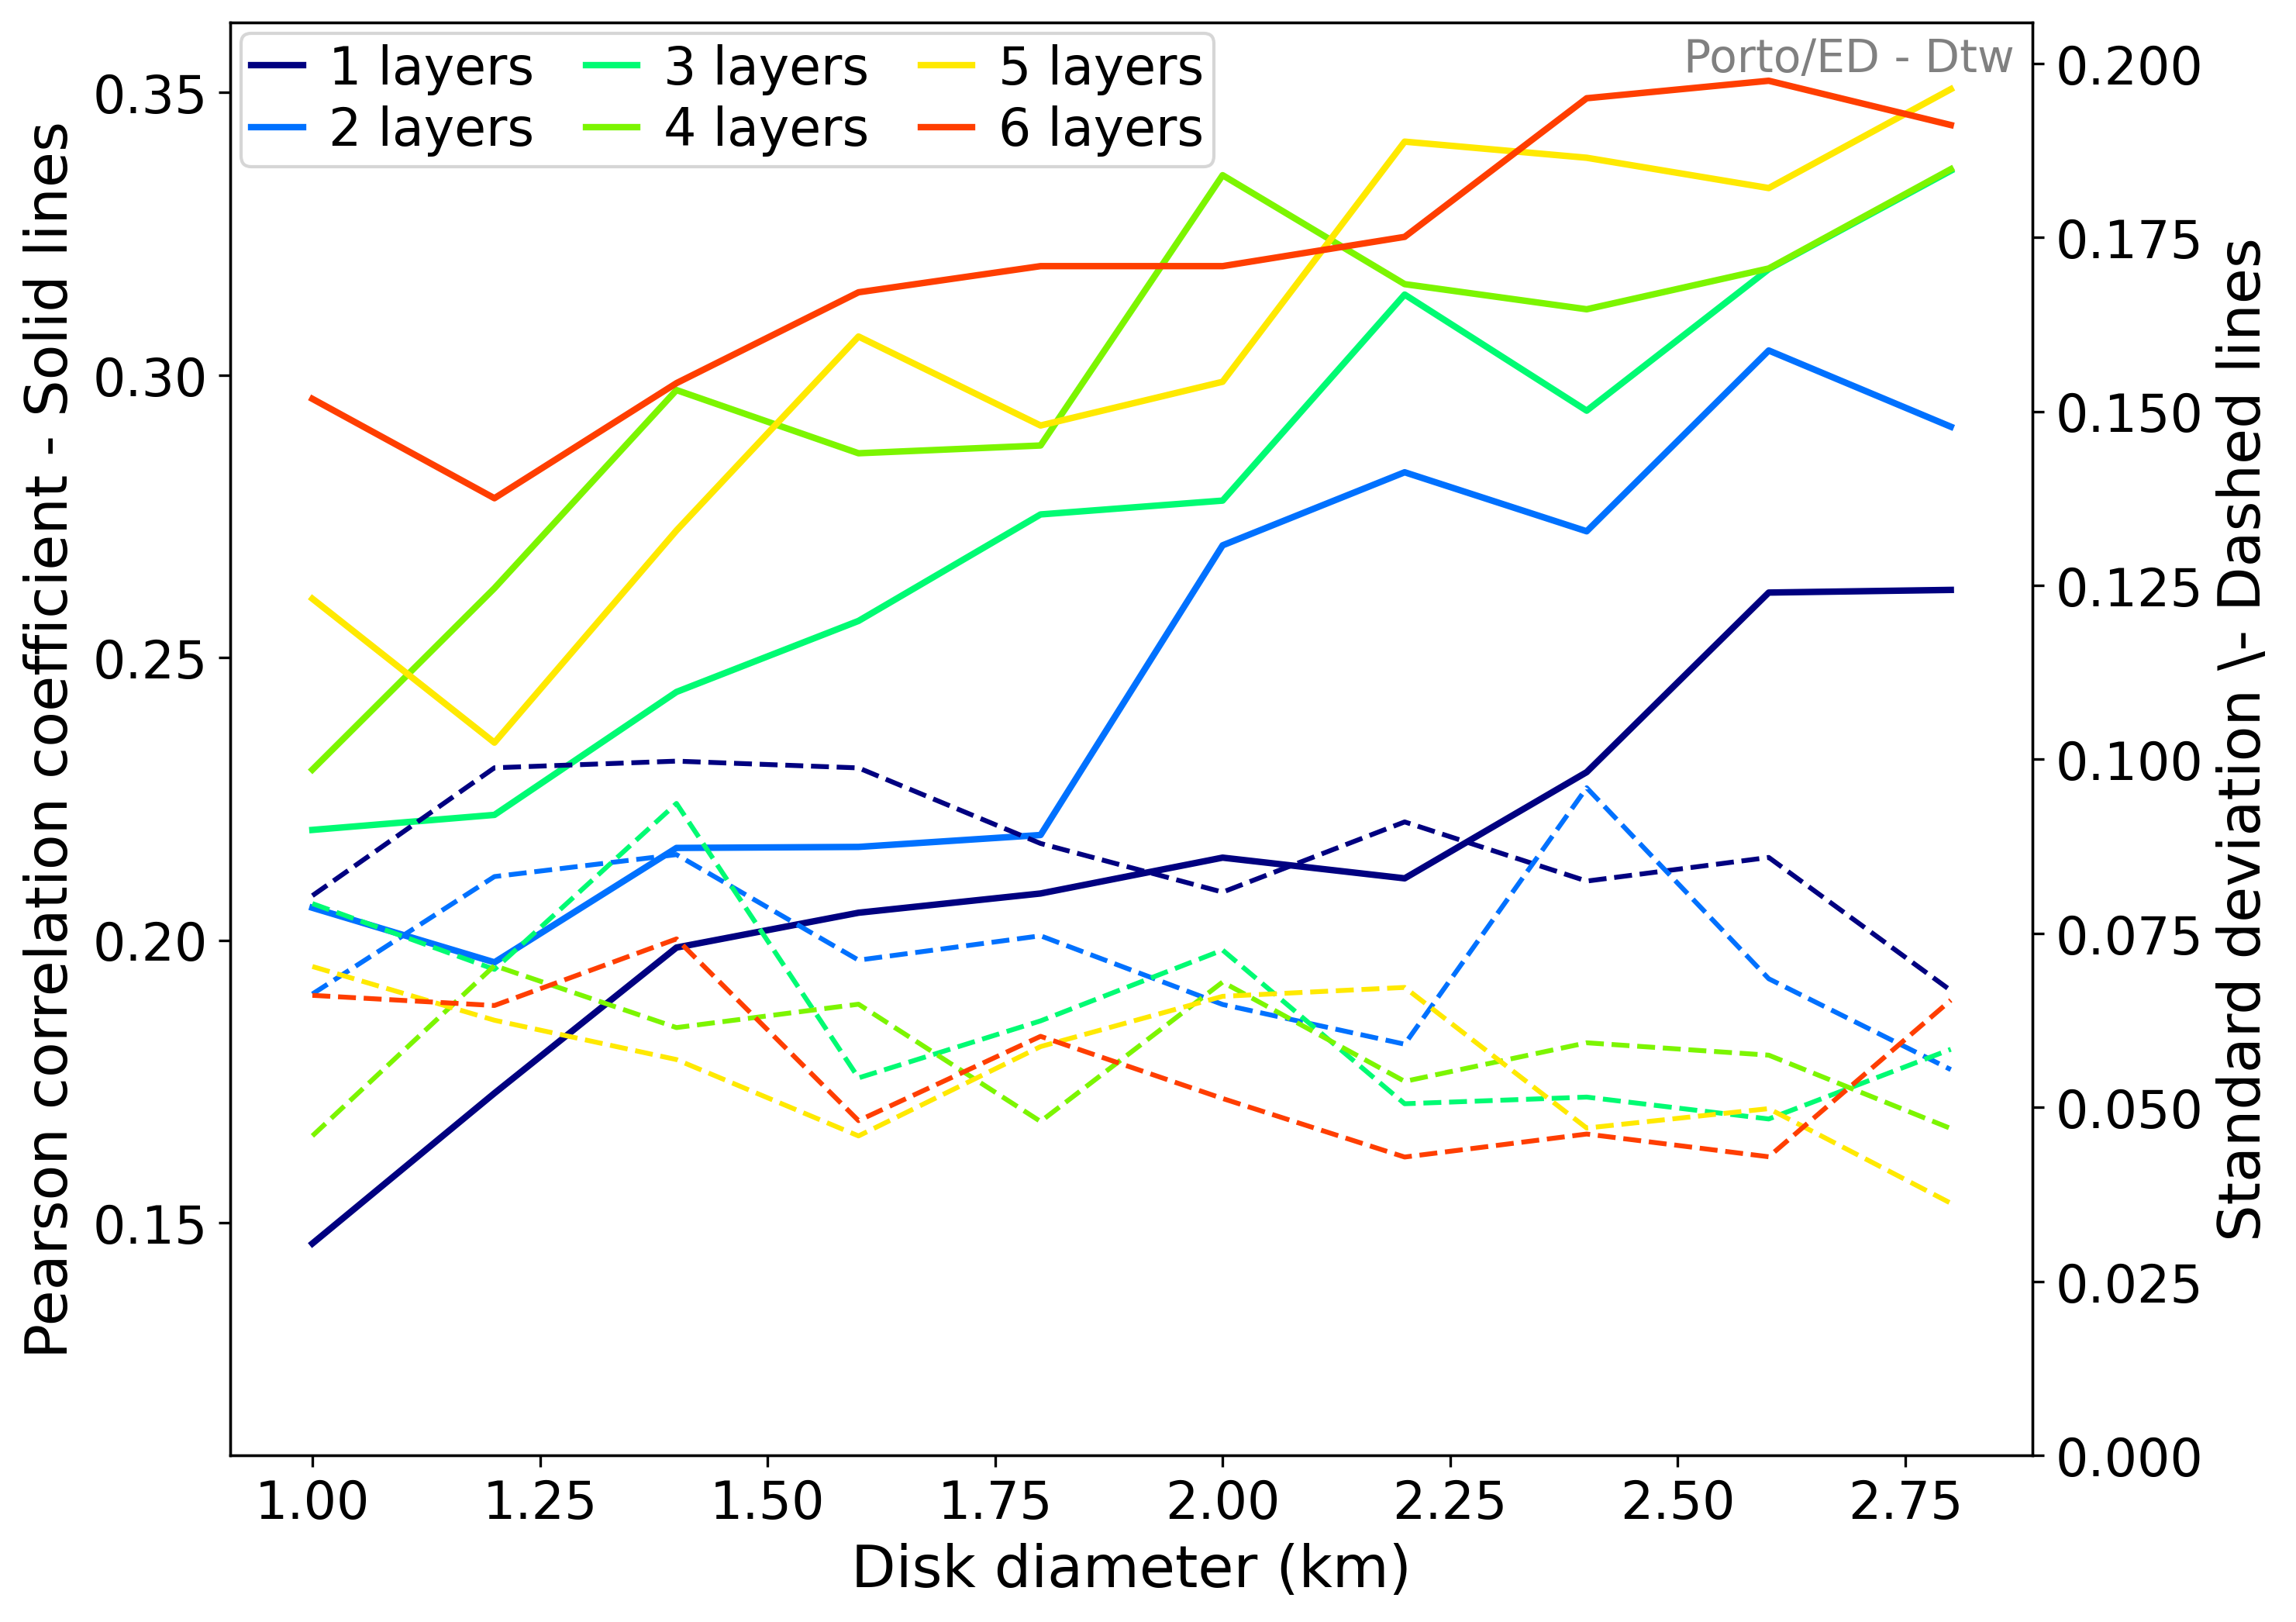

In [2]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_ed", reference="dtw", parallell_jobs=20 )

In [3]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_ed", reference="frechet", parallell_jobs=20 )

# Plotting disk number figure

In [2]:
plot_disk_numbers("porto", 4, 2.2, [10,20,30,40,50,60,70,80,90,100], parallell_jobs=30)

# Computing the hash similarities that will be used for further research

In [1]:
from experiments.grid_similarity import generate_grid_hash_similarity
from experiments.disk_similarity import generate_disk_hash_similarity
import os

In [6]:
# Grid Porto
similarities = generate_grid_hash_similarity("porto", 1.6, 5)
output_path = "../code/experiments/similarities/grid_porto.csv"
similarities.to_csv(os.path.abspath(output_path))

In [2]:
# Disk Porto
similarities = generate_disk_hash_similarity("porto", 2.2, 4, 60)
output_path = "../code/experiments/similarities/disk_porto.csv"
similarities.to_csv(os.path.abspath(output_path))

# Runtimes of grid similarity computations

In [1]:
from experiments.grid_similarity import measure_grid_hash_similarity_computation_time
from utils.figure_creator import draw_hash_similarity_runtime, draw_hash_similarity_runtime_logarithmic
import pandas as pd
import os
import numpy as np

In [9]:
# Measuring Grid Porto similarity computation times

runs = 10
data_sets = range(100,1001,100)
output_folder = "../code/experiments/timing/"
file_name = "similarity_runtimes_grid_porto.csv"

df = pd.DataFrame( index=[f"run_{x+1}" for x in range(runs)], columns=[x for x in data_sets])

for size in data_sets:
    print(f"Computing size {size}", end="\r")
    execution_times = measure_grid_hash_similarity_computation_time("porto", size, 1.6, 5, "dtw", parallell_jobs=10)
    df[size] = execution_times

df.to_csv(os.path.join(output_folder, file_name))
df

100       200       300       400        500        600   \
run_1   0.421875  1.968750  4.828125  8.328125  18.828125  34.296875   
run_2   0.578125  2.484375  5.375000  8.656250  19.515625  33.781250   
run_3   0.468750  1.875000  4.750000  9.468750  20.453125  34.187500   
run_4   0.421875  2.078125  4.578125  8.343750  18.906250  33.812500   
run_5   0.406250  2.328125  4.968750  9.093750  19.812500  35.140625   
run_6   0.234375  2.015625  4.640625  8.578125  19.515625  35.500000   
run_7   0.296875  1.953125  4.781250  8.718750  19.437500  34.187500   
run_8   0.484375  2.125000  4.921875  9.000000  20.250000  35.453125   
run_9   0.359375  2.000000  5.171875  9.937500  19.296875  34.640625   
run_10  0.406250  2.015625  4.843750  8.515625  19.453125  34.828125   

             700        800        900        1000  
run_1   41.187500  47.546875  62.609375  68.609375  
run_2   41.171875  47.390625  62.515625  70.218750  
run_3   41.328125  49.781250  62.265625  69.296875  
run_4   40.140625  47.125000  62.421875  66.187500  
run_5   40.281250  46.484375  61.046875  66.093750  
run_6   40.328125  47.218750  61.437500  68.234375  
run_7   41.546875  48.953125  63.500000  68.640625  
run_8   39.359375  46.843750  62.328125  72.109375  
run_9   39.437500  47.343750  63.296875  69.859375  
run_10  41.437500  46.812500  59.468750  68.890625

[100 200 300 400 500 600 700]


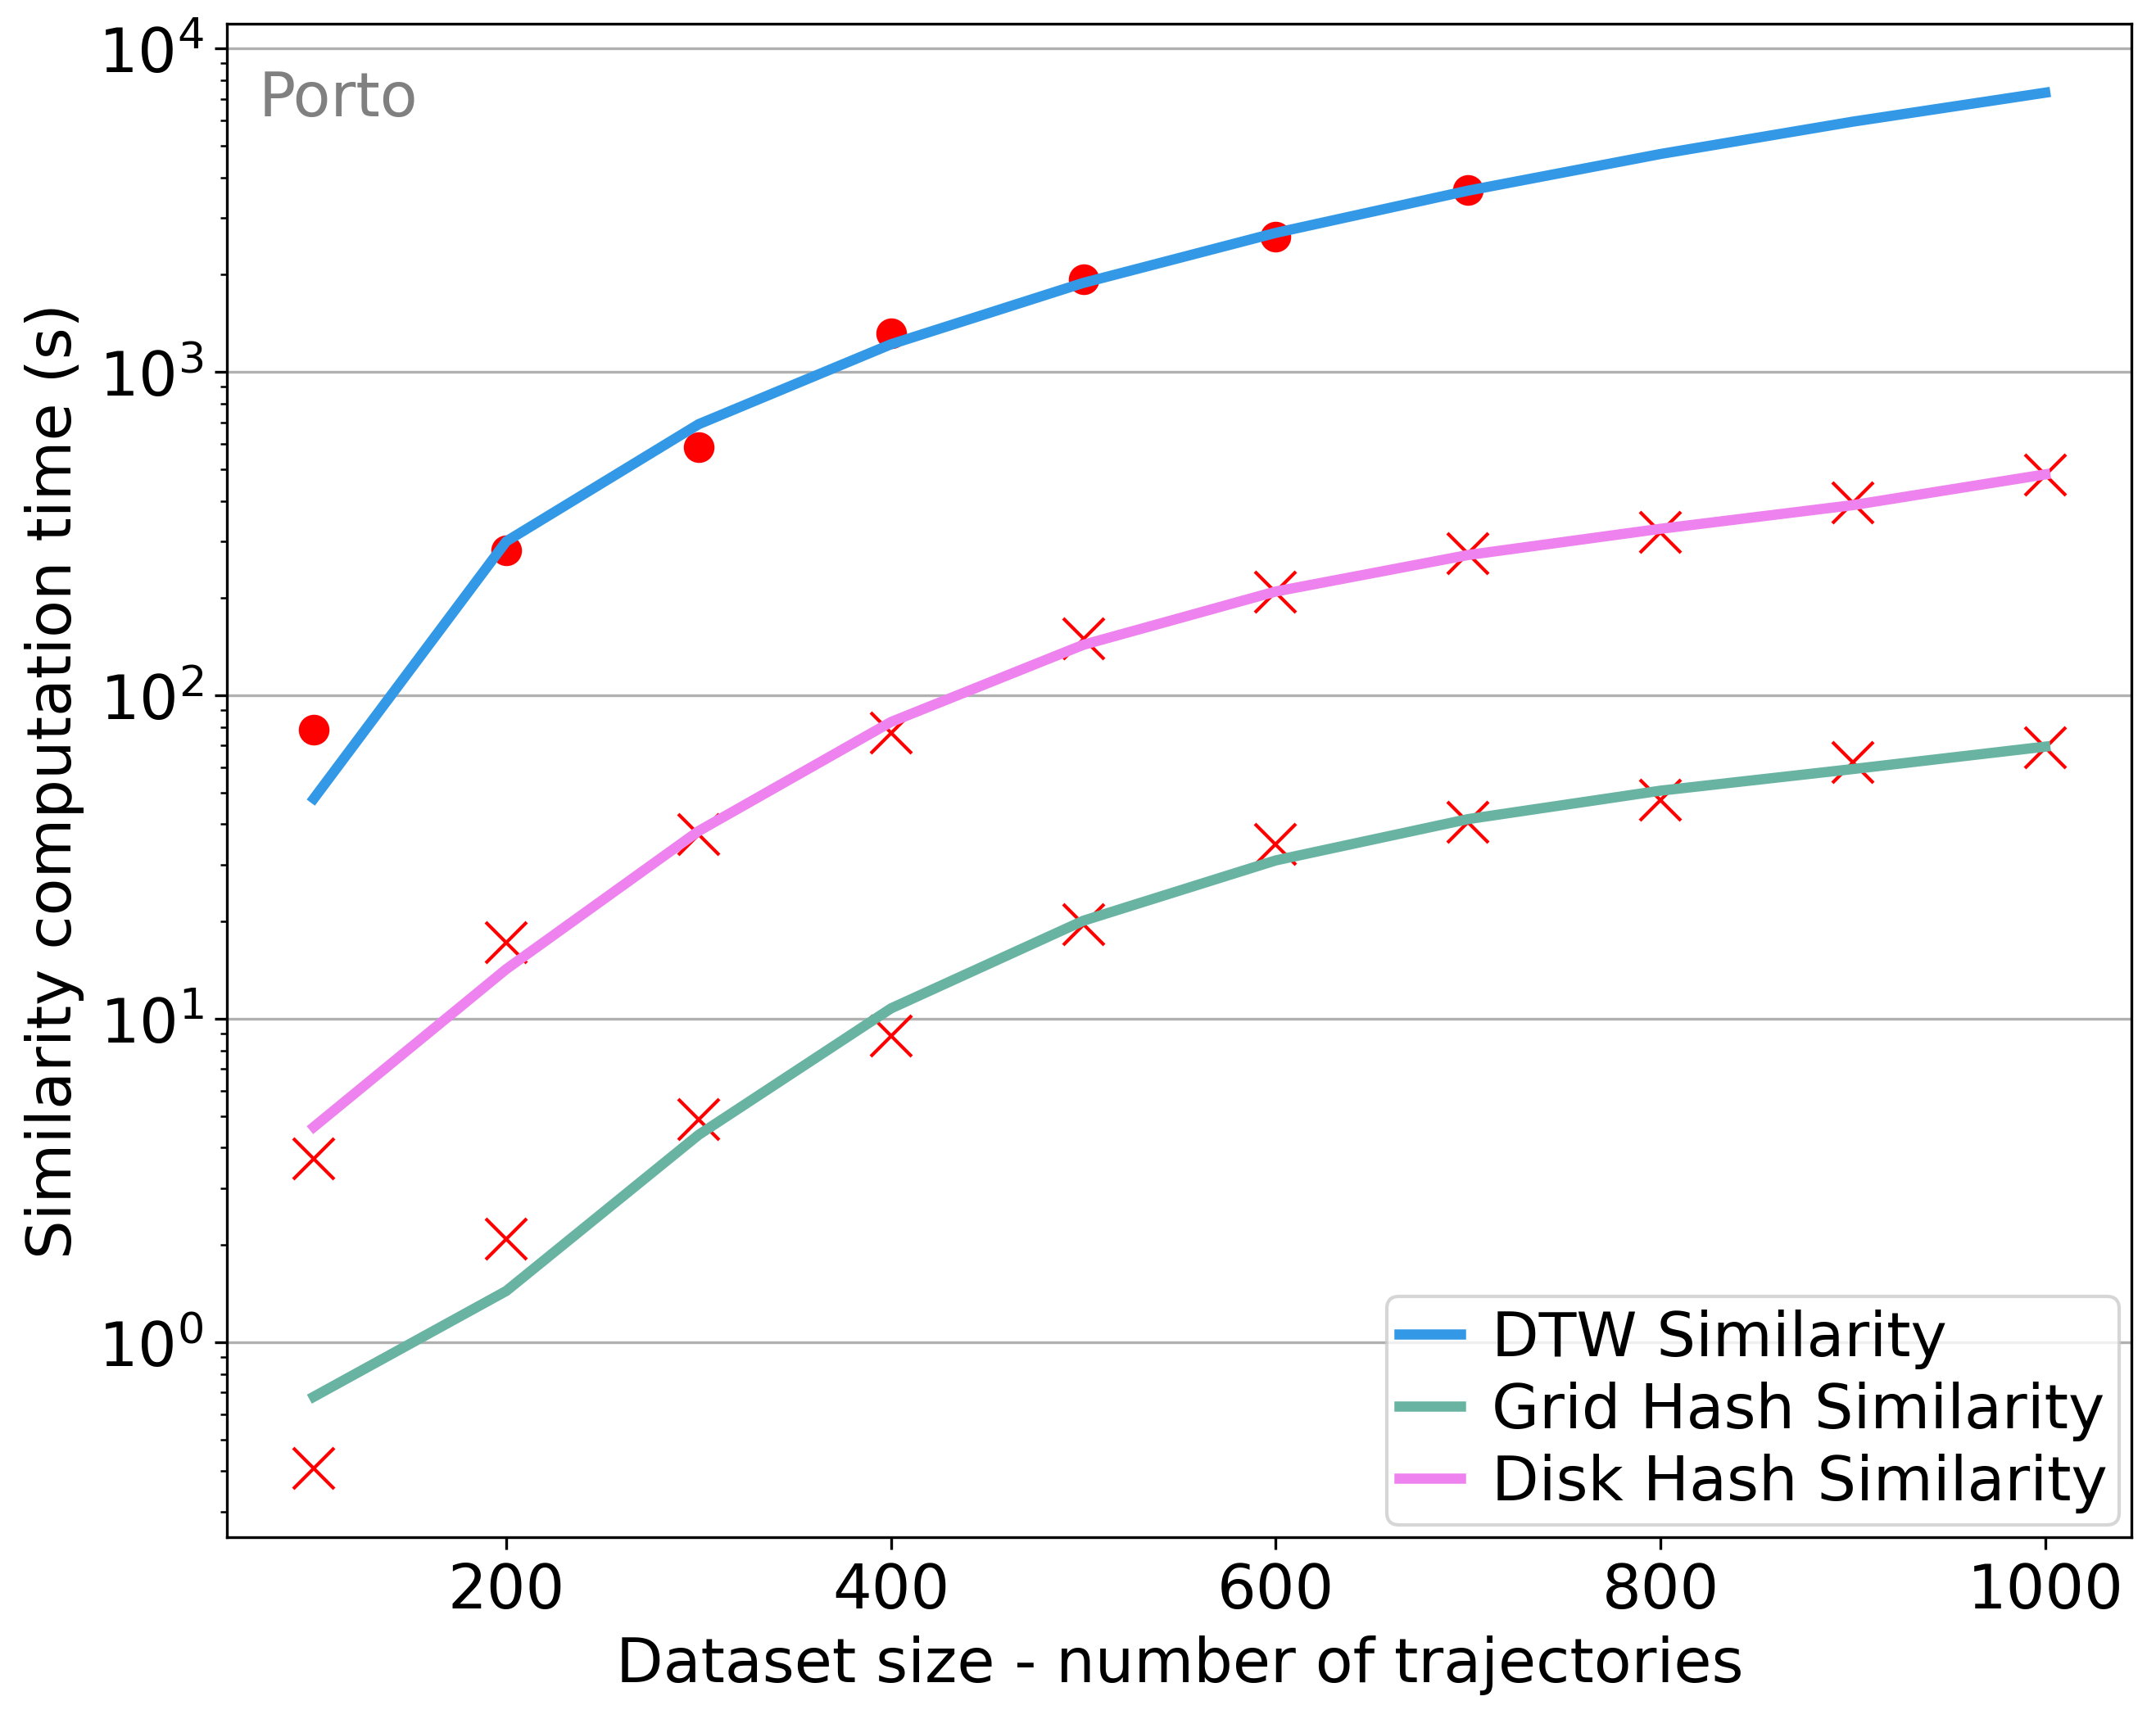

In [1]:
# Generating a figure visualising the computation runtime of the hashes over Porto
from utils.figure_creator import draw_hash_similarity_runtime_logarithmic
import os
grid_path = os.path.abspath("../code/experiments/timing/similarity_runtimes_grid_porto.csv")
disk_path = os.path.abspath("../code/experiments/timing/similarity_runtimes_disk_porto.csv")
referencepath = os.path.abspath("../code/experiments/timing/similarity_runtimes_true_dtw_porto.csv")
city = "Porto"
draw_hash_similarity_runtime_logarithmic(city, grid_path, disk_path, path_to_reference=referencepath)

# Runtimes of disk similarity computations

In [2]:
from experiments.disk_similarity import measure_disk_hash_similarity_computation_time
import pandas as pd

In [ ]:
# Measuring Disk Porto similarity computation times

runs = 10
data_sets = range(100,1001,100)
output_folder = "../code/experiments/timing/"
file_name = "similarity_runtimes_disk_porto.csv"

df = pd.DataFrame( index=[f"run_{x+1}" for x in range(runs)], columns=[x for x in data_sets])

for size in data_sets:
    print(f"Computing size {size}", end="\r")
    execution_times = measure_disk_hash_similarity_computation_time("porto", size, 2.2, 4, 60,"kd", measure="dtw", parallell_jobs=10)
    df[size] = execution_times

df.to_csv(os.path.join(output_folder, file_name))
df

# Computing variance from 10 different runs

In [1]:
from experiments.correlation import compute_correlation_similarity

In [3]:
compute_correlation_similarity("porto", "grid", 10)

Run : 0
Run : 1
Run : 2
Run : 3
Run : 4
Run : 5
Run : 6
Run : 7
Run : 8
Run : 9
porto grid : (min, max, avg, std)
DTW: 0.439898995068277 0.4717888476398085 0.45653393832025263 0.009853593886299344
FRE: 0.6187495758036454 0.6536180502826525 0.6395908820414309 0.010252667341483659


In [4]:
compute_correlation_similarity("porto", "disk", 10)

Run : 0
Run : 1
Run : 2
Run : 3
Run : 4
Run : 5
Run : 6
Run : 7
Run : 8
Run : 9
porto disk : (min, max, avg, std)
DTW: 0.6377392101073246 0.6942677834873745 0.6661029222780737 0.01677821895827129
FRE: 0.8294638409106131 0.8592444080913653 0.8433878899048948 0.01206334020929217
